In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('medical_examination.csv')

In [3]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
df.cholesterol.value_counts()

1    52385
2     9549
3     8066
Name: cholesterol, dtype: int64

In [5]:
df.gluc.value_counts()

1    59479
3     5331
2     5190
Name: gluc, dtype: int64

In [6]:
# df['overweight'] = 
#  first calculate their BMI by dividing their weight in kilograms by the square of their height in meters. If that value is > 25 then the person is overweight. Use the value 0 for NOT
# overweight and the value 1 for overweight.
df['overweight'] = df['weight'] / (df['height']/100)**2 > 25
df['overweight'] = df['overweight'].replace({False:0, True:1})

In [7]:
df[['cholesterol','gluc']] = df[['cholesterol','gluc']].replace({0:1, 1:0, 2:1, 3:1})

### Mañana intento de nuevo, tengo que lograr contar todas las ocurrencias de 0 y 1 de cada valor, sumarlas en el eje y, pero no pude indexar correctamente.
##### Luego, separar con el hue='valor' para que me divida en 0 y 1. Y averiguar mejor como funciona el snscatplot que es el que me está pidiendo realmente, aunque la imagen parece un barplot

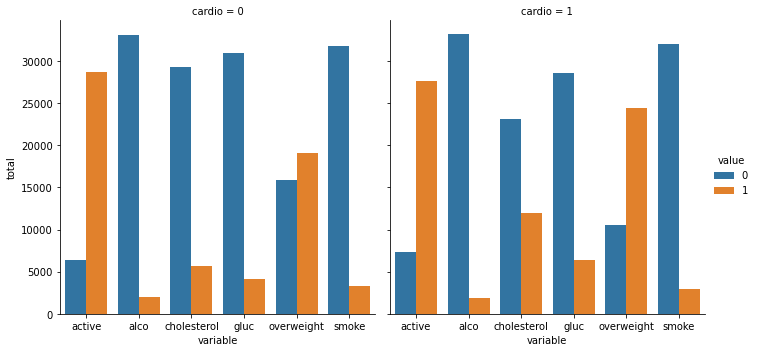

In [69]:
df_cat = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])
df_cat = df_cat.sort_values(by=['variable'])
fig = sns.catplot(data = df_cat, x='variable', hue='value', kind='count', col='cardio')
fig.set_ylabels('total')


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
 13  overweight   70000 non-null  int64  
dtypes: float64(1), int64(13)
memory usage: 7.5 MB


In [ ]:
df_heat = df[(df['ap_lo'] <= df['ap_hi']) & df['height'] >= (df['height'].quantile(0.025)) & df['height'] <= (df['height'].quantile(0.975)) & df['weight'] >= (df['weight'].quantile(0.025)) & df['weight'] <= (df['weight'].quantile(0.975))
    ]

TypeError: Cannot perform 'rand_' with a dtyped [int64] array and scalar of type [bool]

In [75]:
clean_df = df[(df['ap_lo'] <= df['ap_hi'])]
clean_df = clean_df[(clean_df['height'] >= clean_df['height'].quantile(0.025)) & (clean_df['height'] <= clean_df['height'].quantile(0.975))] 
df_heat = clean_df[(clean_df['weight'] >= clean_df['weight'].quantile(0.025)) & (clean_df['weight'] <= clean_df['weight'].quantile(0.975))]

<AxesSubplot:>

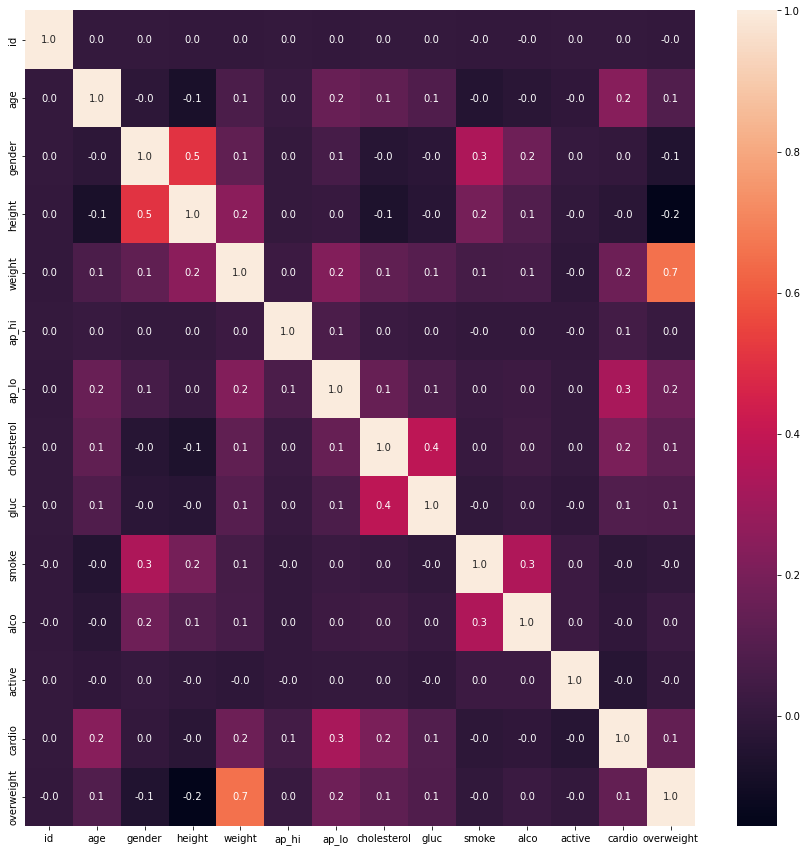

In [76]:
corr = df_heat.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr, annot=True, fmt='.1f')

In [78]:
corr.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,1.000000,0.002623,0.003799,0.000221,0.000144,0.003489,0.000429,0.003867,0.002477,-0.002403,-0.001039,0.005890,0.003770,-0.000769
age,0.002623,1.000000,-0.018274,-0.077426,0.069705,0.018482,0.152787,0.129582,0.087280,-0.044208,-0.026956,-0.011471,0.239987,0.089282
gender,0.003799,-0.018274,1.000000,0.504722,0.130116,0.004941,0.059500,-0.037669,-0.021178,0.337682,0.169178,0.007702,0.001727,-0.055146
height,0.000221,-0.077426,0.504722,1.000000,0.248868,0.004300,0.015356,-0.064477,-0.031410,0.187389,0.089257,-0.005042,-0.025673,-0.156139
weight,0.000144,0.069705,0.130116,0.248868,1.000000,0.026527,0.223786,0.132686,0.104475,0.055805,0.058286,-0.012112,0.166886,0.655764


<AxesSubplot:>

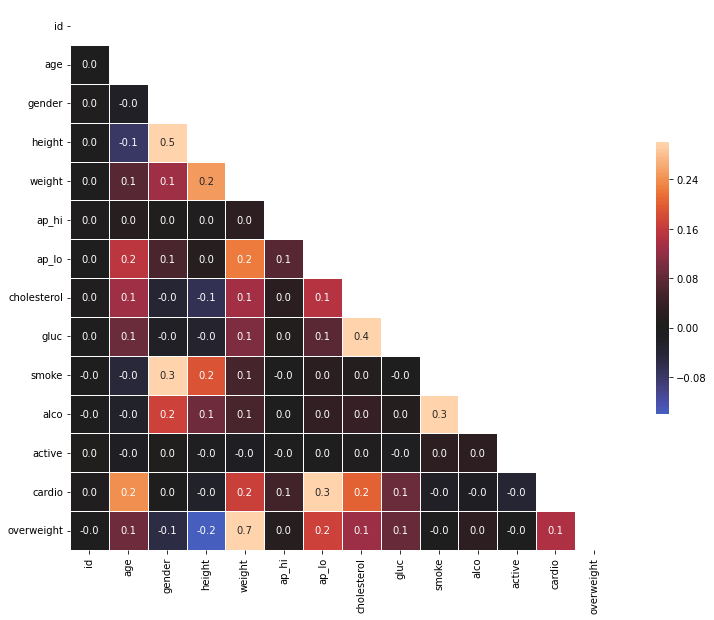

In [128]:
mask = np.triu(corr)
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(corr, annot=True, fmt='.1f', mask = mask, linewidth=1, vmax=.3, vmin=-0.14, center=0.0, square=True, cbar_kws = {'shrink' : 0.5, 'ticks':[-0.08,0,0.08,0.16,0.24]})

Traceback (most recent call last):
  File "/home/runner/boilerplate-medical-data-visualizer-1/test_module.py", line 47, in test_heat_map_values
    self.assertEqual(actual, expected, "Expected different values in heat map.")
AssertionError: Lists differ: ['0.0[59 chars], '0.2', '0.0', '0.0', '0.0', '0.0', '0.0', '0[548 chars]0.1'] != ['0.0[59 chars], '0.3', '0.0', '0.0', '0.0', '0.0', '0.0', '0[548 chars]0.1']

First differing element 9:
'0.2'
'0.3'

Diff is 1023 characters long. Set self.maxDiff to None to see it. : Expected different values in heat map.

In [9]:

def draw_cat_plot():


# Draw Heat Map
def draw_heat_map():
    # Clean the data
    df_heat = None

    # Calculate the correlation matrix
    corr = None

    # Generate a mask for the upper triangle
    mask = None



    # Set up the matplotlib figure
    fig, ax = None

    # Draw the heatmap with 'sns.heatmap()'



    # Do not modify the next two lines
    fig.savefig('heatmap.png')
    return fig
